Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
from sklearn.svm import SVC



from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler



from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



Process Data:

In [2]:
df = pd.read_csv('BCCC-CIRA-CIC-DoHBrw-2020.csv')

df.head()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,353,80.890348,393,90.056393,469.209877,21.661253,82.888889,66.0,66,2.339046,...,0.534524,1.754601e-09,0.000042,0.000048,0.000019,0.000017,2.028699,0.737490,0.869641,Benign
1,1807,53.056709,4828,141.758602,145520.370987,381.471324,228.793103,76.0,68,1.201609,...,1.591559,5.348911e-05,0.007314,0.011523,0.015273,0.000016,-1.538407,1.573304,0.634722,Malicious
2,15000,479.536009,27719,886.150575,25949.480963,161.088426,135.186709,87.0,87,0.897396,...,0.670950,3.356292e-01,0.579335,0.139518,0.001976,0.000003,0.712241,0.240819,4.152404,Malicious
3,1755,58.193065,4617,153.125406,154088.445853,392.541007,245.112953,75.5,54,1.296268,...,2.029971,1.245935e+02,11.162146,5.011613,0.015778,0.012884,1.342708,0.447829,2.227258,Benign
4,618,3.491495,315,1.779646,319.410000,17.872045,93.300000,105.0,105,-1.963961,...,0.816362,2.975575e-09,0.000054,0.015507,0.015471,0.015466,1.986391,0.751146,0.003502,Benign


Substitute the non-numeric values by numeric values:

In [3]:
df['Label'] = df['Label'].replace({"Benign": 1, "Malicious": -1})

C:\Users\phill\AppData\Local\Temp\ipykernel_11648\3500370859.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace({"Benign": 1, "Malicious": -1})


In [17]:
df.describe()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
count,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,...,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000
mean,4.020093e+04,4.733915e+04,4.250156e+04,3.166829e+04,9.263585e+04,220.169083,173.159814,95.472702,70.749953,0.442934,...,0.972995,1.711825,0.319586,0.442021,0.394671,0.205894,-0.968984,-0.060800,1.114611,0.000000
std,1.439617e+05,4.212751e+05,1.393927e+05,2.566805e+05,1.534938e+05,210.141825,85.506490,32.999740,14.830277,1.551998,...,0.520212,11.106412,1.244031,2.071807,2.351233,1.724873,3.163775,3.198770,1.735820,1.000001
min,5.500000e+01,1.464903e+00,5.400000e+01,1.576245e+00,0.000000e+00,0.000000,56.000000,54.000000,54.000000,-10.000000,...,0.077182,0.000000,0.000000,0.000005,0.000002,-0.000001,-10.000000,-10.000000,0.000000,-1.000000
25%,6.180000e+02,5.410781e+01,4.760000e+02,1.418128e+02,4.692099e+02,21.661253,92.000000,76.000000,66.000000,0.199848,...,0.577836,0.000021,0.004454,0.010538,0.012238,0.000016,-1.797168,0.393686,0.552687,-1.000000
50%,1.807000e+03,3.640969e+02,4.827000e+03,4.611146e+02,1.826789e+04,135.142971,152.488283,87.000000,68.000000,0.986397,...,0.748184,0.000079,0.008820,0.015148,0.015407,0.000034,0.000000,0.908002,0.800649,0.000000
75%,5.542000e+03,3.810260e+03,7.888000e+03,4.215498e+03,1.415989e+05,376.296309,228.758621,105.000000,68.000000,1.201609,...,1.516263,0.000357,0.018640,0.024903,0.016300,0.015161,0.936908,1.305393,1.208105,1.000000
max,8.015359e+06,2.304348e+07,7.723184e+06,7.600000e+06,1.578115e+06,1256.230616,689.800000,317.000000,553.000000,2.932375,...,5.616085,647.245330,25.441017,28.017596,28.017596,28.017596,2.970716,5.428781,66.309747,1.000000


In [4]:
print("Data Analysis:")
print(df.describe())  # View summary statistics
print(df['Label'].value_counts())  # Check class distribution

# Preprocess data (optional)
# ... (Add specific data preprocessing steps as needed, e.g., feature scaling, encoding)

# Encode target variable (if not already done)


# Separate features and target variable
X = df.drop('Label', axis=1)
y = df['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate different learning algorithms
def train_and_evaluate(model_name, model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # Evaluate performance
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f"\n{model_name} Classifier:")
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-measure:", f1)

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
train_and_evaluate("Decision Tree", dt_classifier)

Data Analysis:
       FlowBytesSent  FlowSentRate  FlowBytesReceived  FlowReceivedRate  \
count   4.991060e+05  4.991060e+05       4.991060e+05      4.991060e+05   
mean    4.020093e+04  4.733915e+04       4.250156e+04      3.166829e+04   
std     1.439617e+05  4.212751e+05       1.393927e+05      2.566805e+05   
min     5.500000e+01  1.464903e+00       5.400000e+01      1.576245e+00   
25%     6.180000e+02  5.410781e+01       4.760000e+02      1.418128e+02   
50%     1.807000e+03  3.640969e+02       4.827000e+03      4.611146e+02   
75%     5.542000e+03  3.810260e+03       7.888000e+03      4.215498e+03   
max     8.015359e+06  2.304348e+07       7.723184e+06      7.600000e+06   

       PacketLengthVariance  PacketLengthStandardDeviation  PacketLengthMean  \
count          4.991060e+05                  499106.000000     499106.000000   
mean           9.263585e+04                     220.169083        173.159814   
std            1.534938e+05                     210.141825         85

In [19]:
# Assuming your data is loaded into X (features) and y (labels)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("K-NN Accuracy:", accuracy)


K-NN Accuracy: 0.9982268437819318


Data Analysis:
       FlowBytesSent  FlowSentRate  FlowBytesReceived  FlowReceivedRate  \
count   4.991060e+05  4.991060e+05       4.991060e+05      4.991060e+05   
mean    4.020093e+04  4.733915e+04       4.250156e+04      3.166829e+04   
std     1.439617e+05  4.212751e+05       1.393927e+05      2.566805e+05   
min     5.500000e+01  1.464903e+00       5.400000e+01      1.576245e+00   
25%     6.180000e+02  5.410781e+01       4.760000e+02      1.418128e+02   
50%     1.807000e+03  3.640969e+02       4.827000e+03      4.611146e+02   
75%     5.542000e+03  3.810260e+03       7.888000e+03      4.215498e+03   
max     8.015359e+06  2.304348e+07       7.723184e+06      7.600000e+06   

       PacketLengthVariance  PacketLengthStandardDeviation  PacketLengthMean  \
count          4.991060e+05                  499106.000000     499106.000000   
mean           9.263585e+04                     220.169083        173.159814   
std            1.534938e+05                     210.141825         85

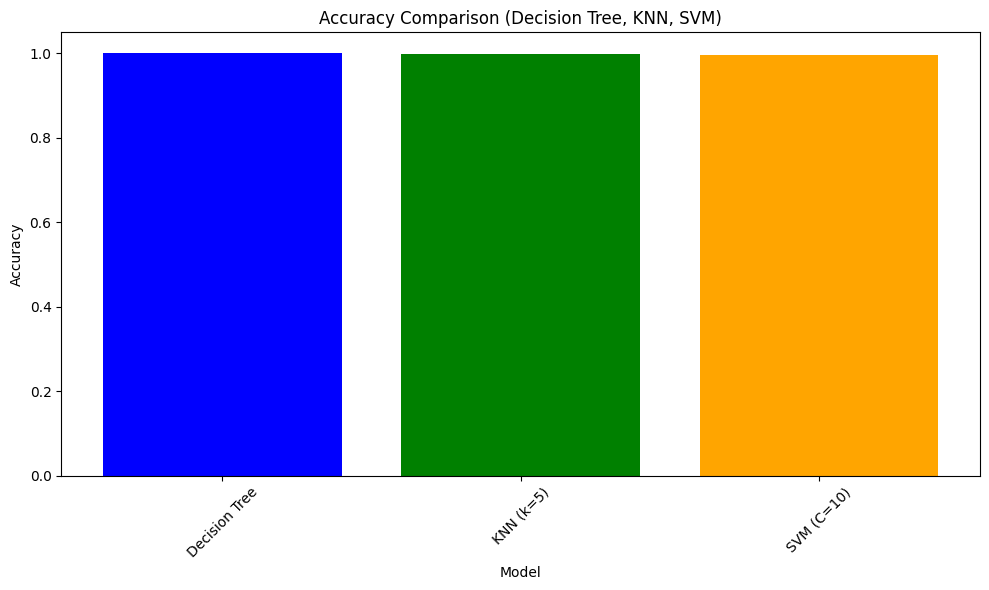

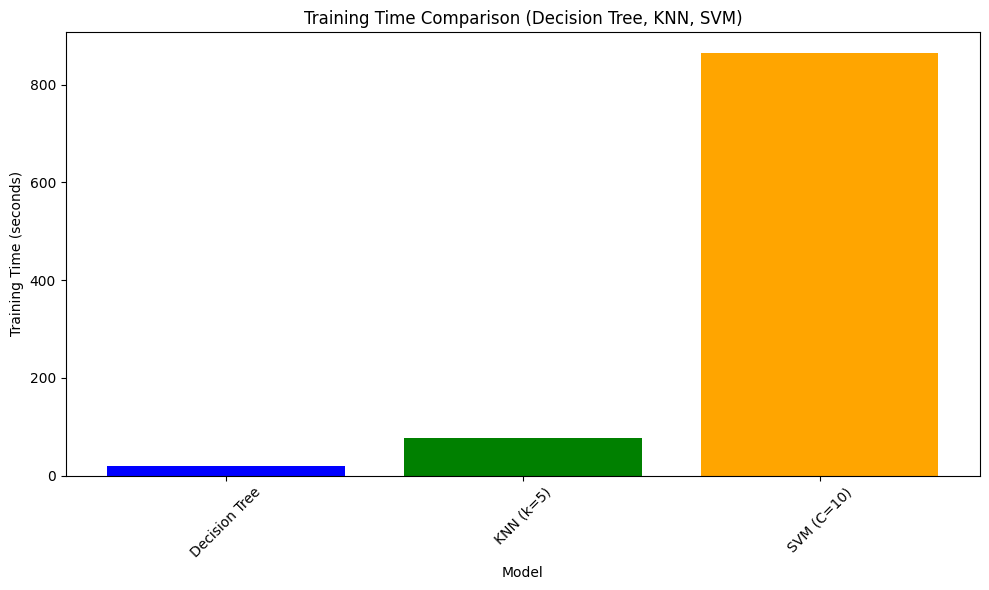

In [5]:
# Assuming your data is loaded into a DataFrame named 'df'

# Exploratory Data Analysis (EDA)
print("Data Analysis:")
print(df.describe())  # View summary statistics
print(df['Label'].value_counts())  # Check class distribution

# Preprocess data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_names = []
accuracies = []
training_times = []

# Function to train, evaluate, and plot performance
def train_evaluate_plot(model_name, model):
  start_time = time.time()  # Start time measurement for efficiency comparison
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # Calculate and print performance metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  end_time = time.time()  # End time measurement

  print(f"\n{model_name} Classifier:")
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-measure:", f1)
  print(f"Training Time: {end_time - start_time:.2f} seconds")  # Print training time

  # Prepare data for plotting
  model_names.append(model_name)
  accuracies.append(accuracy)
  training_times.append(end_time - start_time)  # Add training time for comparison

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
train_evaluate_plot("Decision Tree", dt_classifier)

# Train KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Initial configuration (adjust k as needed)
train_evaluate_plot("KNN (k=5)", knn_classifier)

svm_classifier = SVC(C=10)
train_evaluate_plot("SVM (C=10)", svm_classifier)

# Experiment with different k values (consider GridSearchCV)
# ... (Add code to explore different k values here)

# Prepare data for plotting both models

# Plot performance comparison
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])  # Add color for KNN
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison (Decision Tree, KNN, SVM)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.figure(figsize=(10, 6))
plt.bar(model_names, training_times, color=['blue', 'green', 'orange'])  # Add color for KNN
plt.xlabel("Model")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time Comparison (Decision Tree, KNN, SVM)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

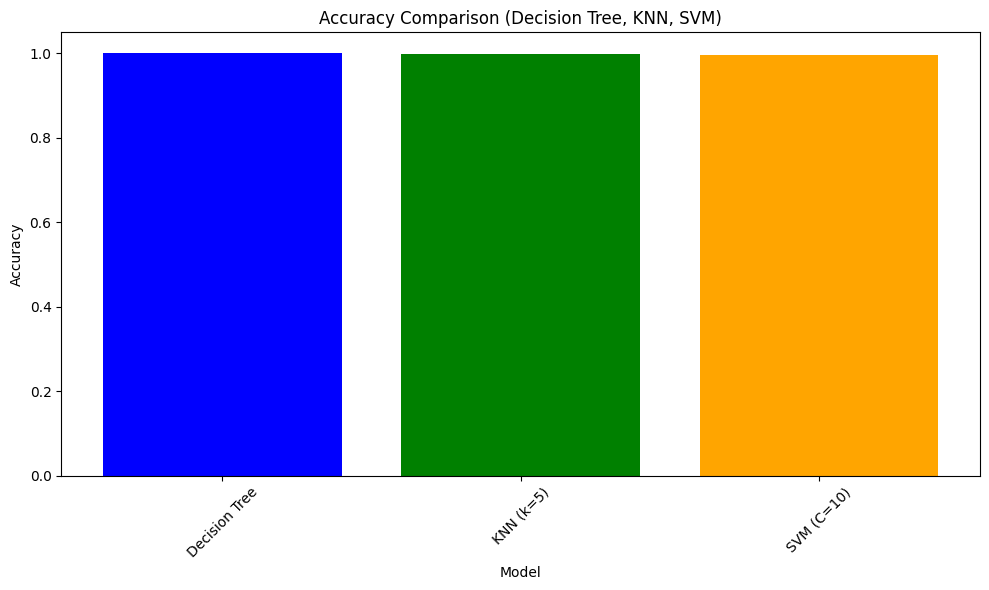

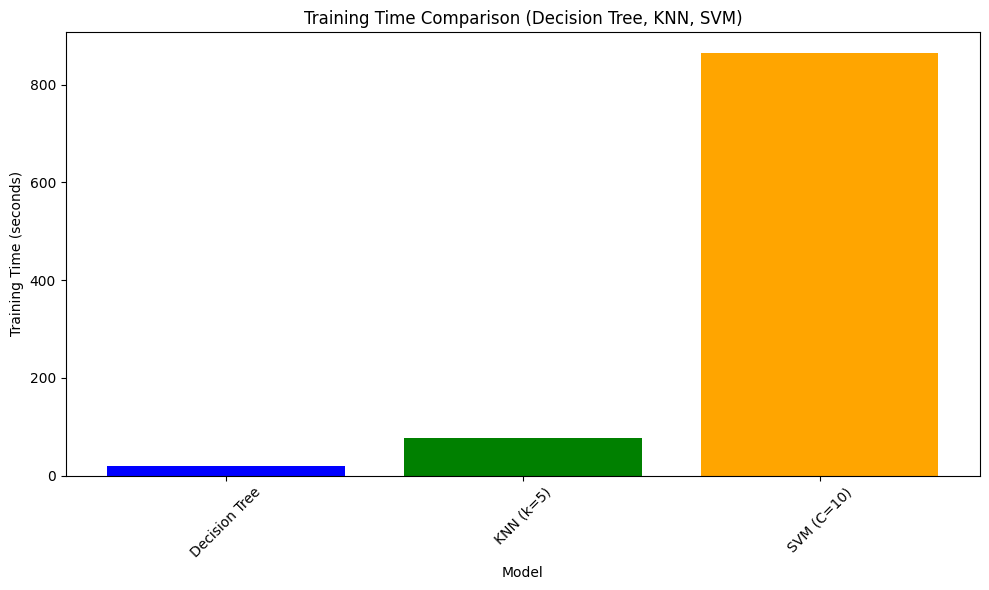

In [6]:
# Plot performance comparison
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison (Decision Tree, KNN, SVM)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.figure(figsize=(10, 6))
plt.bar(model_names, training_times, color=['blue', 'green', 'orange'])
plt.xlabel("Model")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time Comparison (Decision Tree, KNN, SVM)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()